In [35]:
!pip install nltk

In [36]:
import nltk

In [37]:
import string 
from collections import Counter
import matplotlib.pyplot as plt


In [38]:
pip install GetOldTweets3

Note: you may need to restart the kernel to use updated packages.


In [39]:
def get_tweets():
    import GetOldTweets3 as got
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('CoronaVirus') \
    .setSince("2020-07-09") \
    .setUntil("2020-08-10") \
    .setMaxTweets(100)
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [40]:
text = " "
text_tweets = get_tweets()
length = len(text_tweets)
for i in range(0,length):
    text = text_tweets[i][0] + " " + text
    
    lower_case = text.lower()
    
    cleaned_text = lower_case.translate(str.maketrans('','',string.punctuation))
    
    tokenized_words = cleaned_text.split()

In [41]:
text_tweets

[['Nine people test positive for coronavirus at Georgia school captured in viral images - NBC News https://www.nbcnews.com/news/us-news/nine-people-test-positive-coronavirus-georgia-school-captured-viral-images-n1236249 via @GoogleNews'],
 ['Aparte la vacuna no se empezó de 0. Es una modificación de la vacuna del coronavirus del SARS'],
 ["exactly. kids have a less chance of dying due to coronavirus. it's a shame that college won't happen."],
 ['Some Canadians are trying to deter US visitors fleeing the coronavirus by vandalizing cars with American license plates. '],
 ['CORONAVIRUS EN LA ARGENTINA: SUMAN 4.606 LOS FALLECIDOS Y 246.499 LOS CONTAGIADOS DESDE EL INICIO DE LA PANDEMIA: '],
 ['It’s going to be screen time all the time for kindergartners and graduate students alike. Teachers are threatening strikes. And students are already coming home infected with the coronavirus, which has upended American education. '],
 ['Por la pandemia, EEUU puso a Argentina en Nivel 4: no viajar | C

In [42]:
stop_words = ["i", "me", "my", "myself", "our", "ourself", "we", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have","has", "had", "having", "do", "does", "did", "doing", "an", "a", "the", "if", "or", "and", "but", "because", "as", "while", "of", "by", "for", "with","about","against","between","into", "through","during","before", "after", "above", "to", "from", "up", "down", "in", "out", "on", "off", "over", "in", "under", "again", "below", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "few", "each", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "to", "o", "s", "t", "can", "will", "just", "don", "should", "now"]

final_words = [word for word in tokenized_words if word not in stop_words]

In [44]:
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',' , '').replace("'", '').strip()
        word,emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)
print("People emotions from the text \n", emotion_list, '\n \n')
            
w = Counter(emotion_list)
print("Count of each emotion \n", w)

People emotions from the text 
 [' sad', ' fearless', ' surprise', ' free', ' hated', ' entitled', ' sad', ' surprise', ' sad'] 
 

Count of each emotion 
 Counter({' sad': 3, ' surprise': 2, ' fearless': 1, ' free': 1, ' hated': 1, ' entitled': 1})


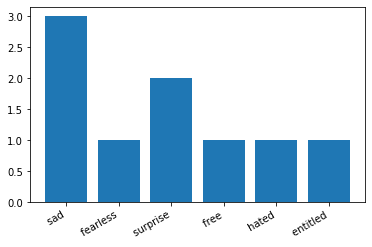

In [45]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(),w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

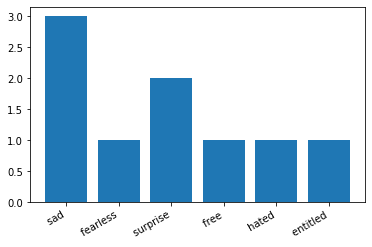

In [46]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(),w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

from nltk.corpus import stopwords

A = ["I am going to school, with my bag"]

vect1 = CountVectorizer()
vect1.fit_transform(A)
print("bag of words :",vect1.get_feature_names())

bag of words : ['am', 'bag', 'going', 'my', 'school', 'to', 'with']


In [56]:
vect1.vocabulary_

{'am': 0, 'going': 2, 'to': 5, 'school': 4, 'with': 6, 'my': 3, 'bag': 1}

In [57]:
c_vect = CountVectorizer()

c_vect.fit(A)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [58]:
B = ["This is a my bag"]
c_new_vect = c_vect.transform(B)

print("Text Present at ",c_new_vect.toarray())

print("original indexes", vect1.get_feature_names())


Text Present at  [[0 1 0 1 0 0 0]]
original indexes ['am', 'bag', 'going', 'my', 'school', 'to', 'with']


In [61]:
stop_words = stopwords.words('english')
A = ["I am going to school, with my bag "]
vect1 = CountVectorizer(stop_words = stop_words)
print(vect1)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [62]:
vect1.fit_transform(A)
print("bag of words :",vect1.get_feature_names())
print("vocab         :",vect1.vocabulary_)

bag of words : ['bag', 'going', 'school']
vocab         : {'going': 1, 'school': 2, 'bag': 0}
